## The Tools
We are planning to use the following packages:

## The API
Next, we will open depth and RGB streams from pre-recorded file and capture a set of frames:


In [1]:
# Setup:
pipe = rs.pipeline()
cfg = rs.config()
#cfg.enable_device_from_file("../object_detection.bag")
profile = pipe.start(cfg)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
  pipe.wait_for_frames()
  
# Store next frameset for later processing:
frameset = pipe.wait_for_frames()
color_frame = frameset.get_color_frame()
depth_frame = frameset.get_depth_frame()

# Cleanup:
pipe.stop()
print("Frames Captured")

NameError: name 'rs' is not defined

## RGB Data
Let's start with accessing the color componnent of the frameset:

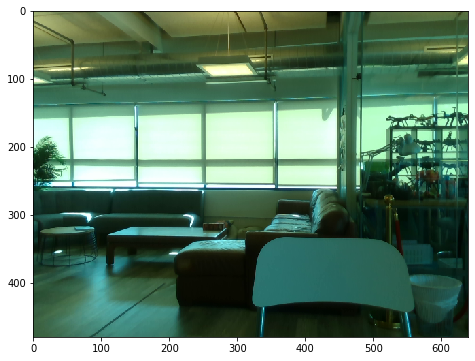

In [3]:
color = np.asanyarray(color_frame.get_data())
plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = [12, 6]
plt.imshow(color)

## Depth Data
Now, we will visualize the depth map captured by the RealSense camera:

In [1]:
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())
plt.imshow(colorized_depth)

NameError: name 'rs' is not defined

In [1]:
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")

Environment Ready


## Stream Alignment
Upon closer inspection you can notice that the two frames are not captured from the same physical viewport.

To combine them into a single RGBD image, let's align depth data to color viewport:

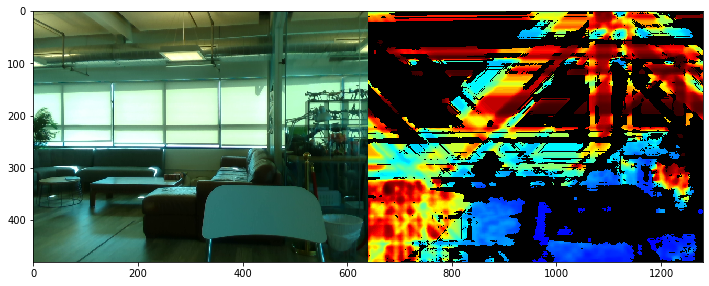

In [5]:
# Create alignment primitive with color as its target stream:
align = rs.align(rs.stream.color)
frameset = align.process(frameset)

# Update color and depth frames:
aligned_depth_frame = frameset.get_depth_frame()
colorized_depth = np.asanyarray(colorizer.colorize(aligned_depth_frame).get_data())

# Show the two frames together:
images = np.hstack((color, colorized_depth))
plt.imshow(images)

Now the two images are pixel-perfect aligned and you can use depth data just like you would any of the other channels.